<Figure size 800x500 with 0 Axes>

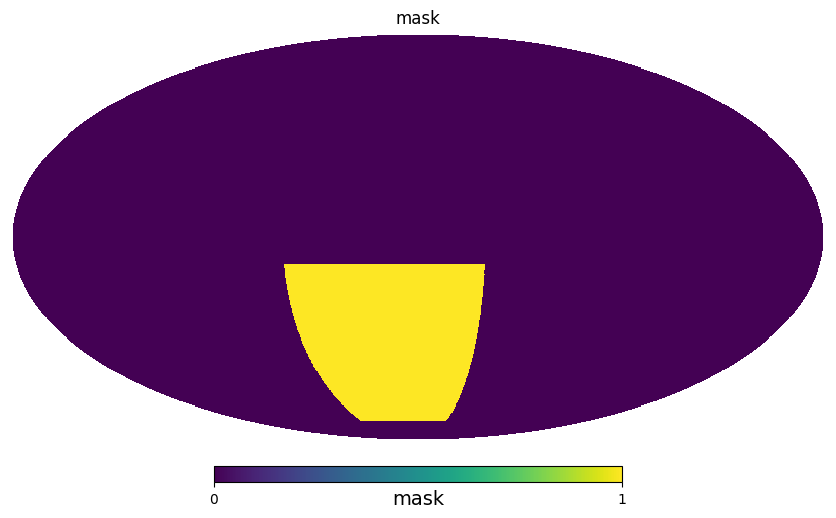

In [55]:
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt

# Parameters
nside = 256  # can adjust to 128 or 512
outfile = "spinelli_like_mask_nside256.fits"
ra_min, ra_max = -30.0, 60.0   # degrees
dec_min, dec_max = -75.0, -10.0  # degrees

# Convert to HEALPix angles
npix = hp.nside2npix(nside)
theta, phi = hp.pix2ang(nside, np.arange(npix), lonlat=False)
ra = np.degrees(phi)
dec = 90.0 - np.degrees(theta)

# wrap RA to [-180, 180]
ra = ((ra + 180) % 360) - 180

# Build mask
mask = (
    (ra >= ra_min) & (ra <= ra_max) &
    (dec >= dec_min) & (dec <= dec_max)
).astype(np.uint8)

# hp.write_map(outfile, mask, overwrite=True, dtype=np.uint8)

# Plot
plt.figure(figsize=(8,5))
hp.mollview(mask, title="mask", unit="mask")
# hp.graticule()
# plt.savefig("spinelli_like_mask.png", dpi=150, bbox_inches="tight")
# plt.close()

# print(f"Mask saved to {outfile}")
# print(f"Fraction of sky: {mask.mean():.4f}")


In [33]:
ff=np.load("/home/iloveorcas/MASS_Thesis/results_2/ff_maps.npy")
sync=np.load("/home/iloveorcas/MASS_Thesis/results_2/sync_maps.npy")

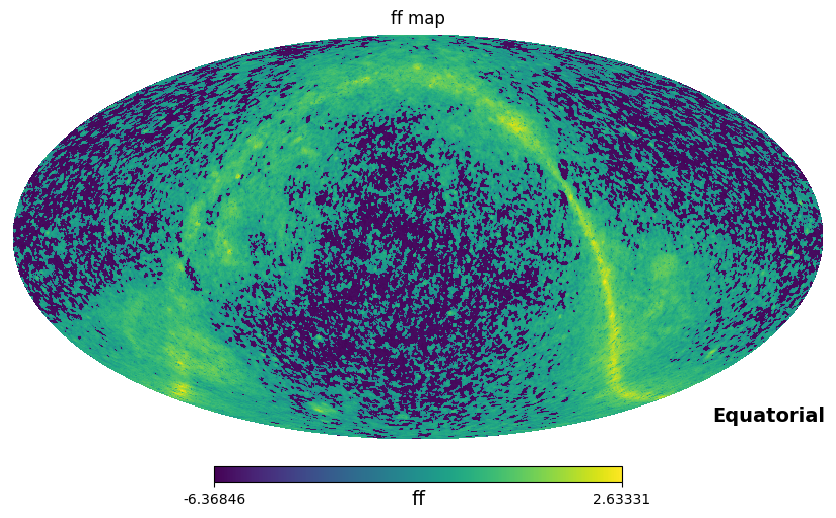

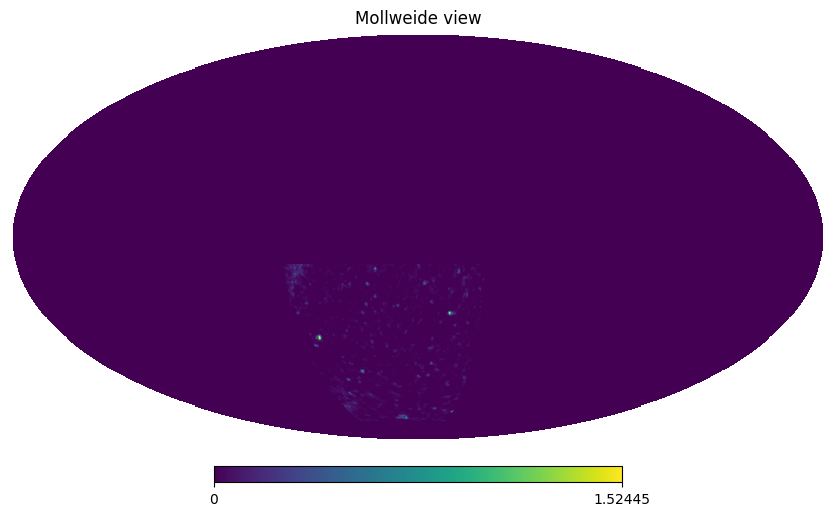

In [56]:
hp.mollview(np.log10(ff[0]), coord=['G', 'C'], title="ff map", unit="ff")
rot=hp.rotator.Rotator(coord=['G', 'C'])
rotated=rot.rotate_map_pixel(ff[0])

hp.mollview(rotated*mask)

In [37]:
hi=np.load('/home/iloveorcas/MASS_Thesis/results_2/hi_maps.npy')

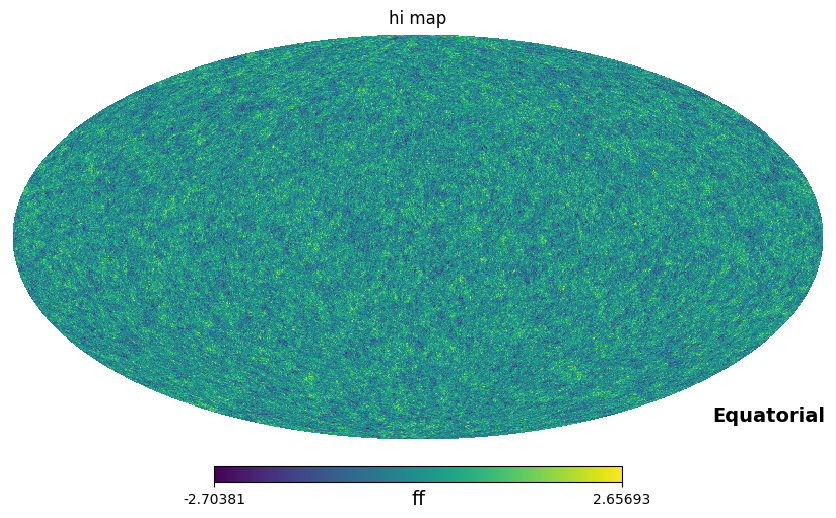

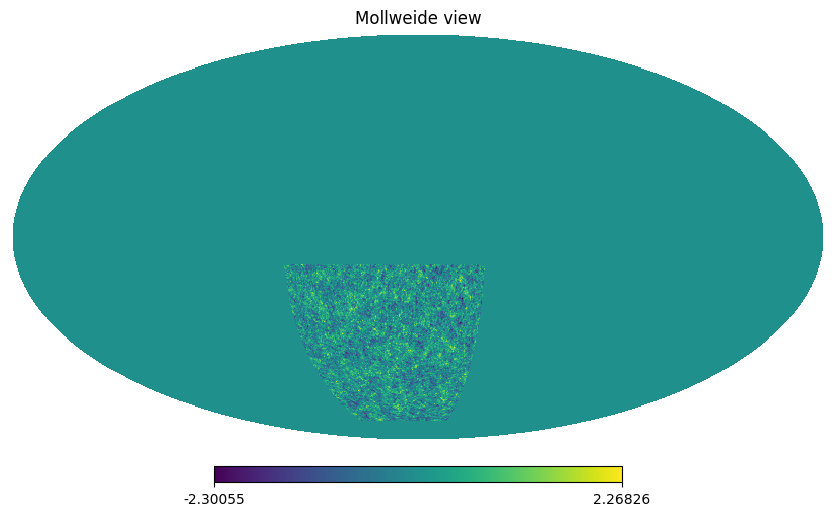

In [57]:
hp.mollview(hi[0], coord=['G', 'C'], title="hi map", unit="ff")
# rot=hp.rotator.Rotator(coord=['G', 'C'])
rotated_h=rot.rotate_map_pixel(hi[0])

hp.mollview(rotated_h*mask)

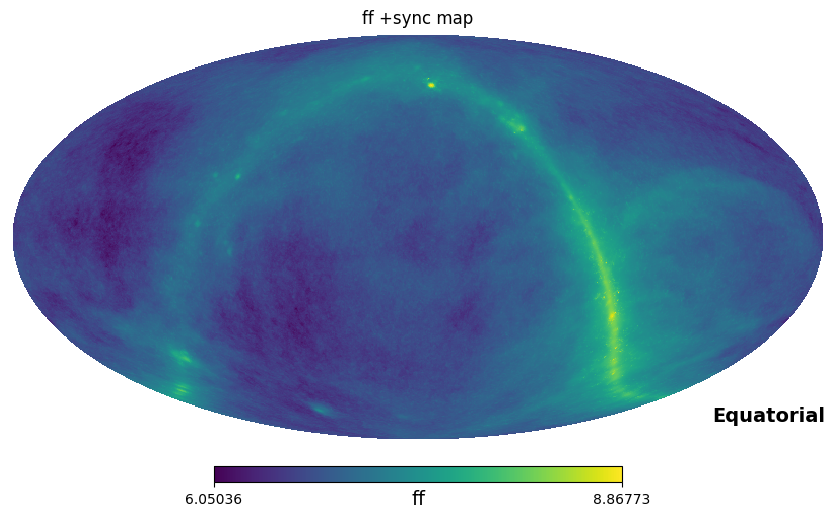

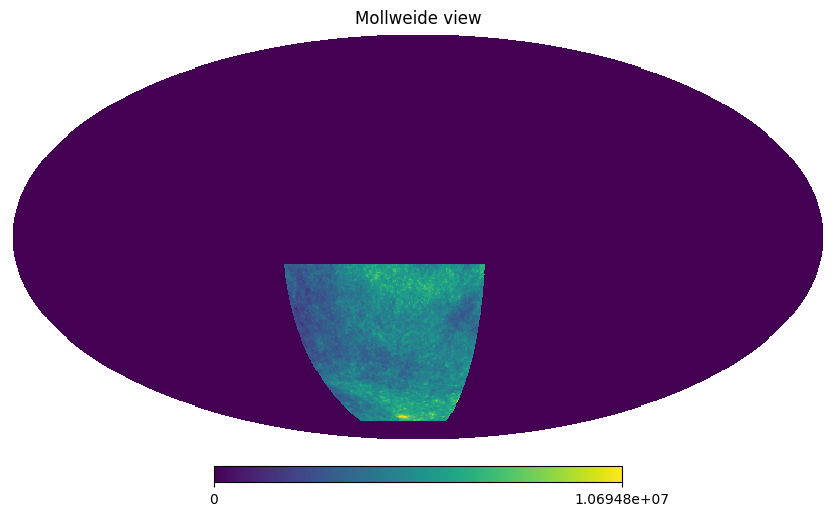

In [58]:
hp.mollview(np.log10(sync[0]+ff[0]), coord=['G', 'C'], title="ff +sync map", unit="ff")
# rot_s=hp.rotator.Rotator(coord=['G', 'C'])
rotated_s=rot.rotate_map_pixel(sync[0]+ff[0])

hp.mollview((rotated_s)*mask)

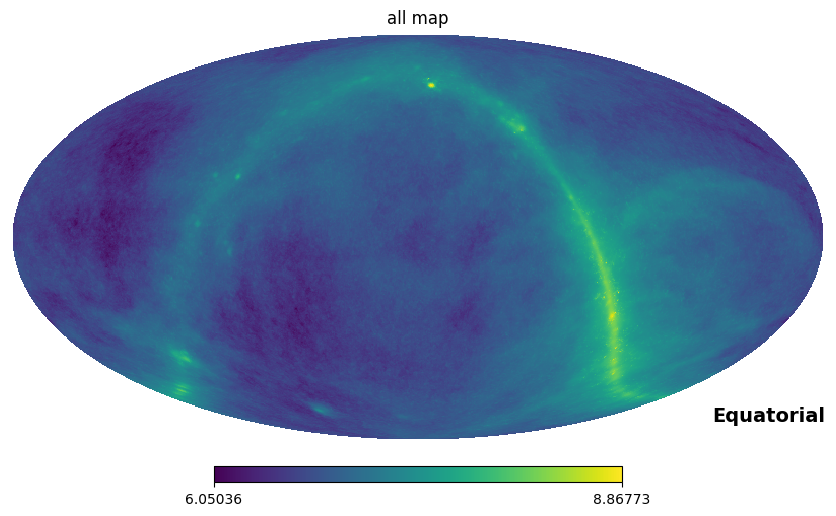

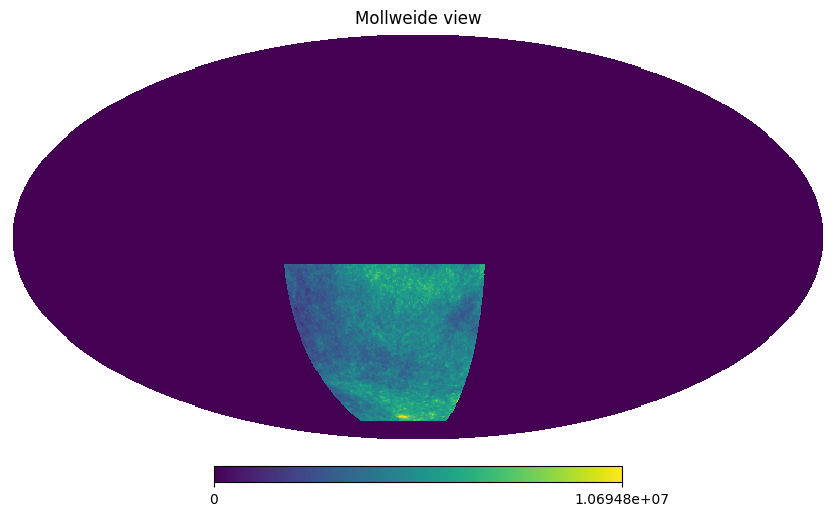

In [59]:
hp.mollview(np.log10(sync[0]+ff[0]+ hi[0]), coord=['G', 'C'], title="all map")
# rot_s=hp.rotator.Rotator(coord=['G', 'C'])
rotated_a=rot.rotate_map_pixel(sync[0]+ff[0]+hi[0])

hp.mollview((rotated_a)*mask)